In [1]:
# Analyse van +5000 IMDB geregistreerde films voor data mining

# dataset gedownload van https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset
# 5043 films met elk 26 variabelen :
# "movie_title" "color" "num_critic_for_reviews" "movie_facebook_likes" "duration" "director_name" "director_facebook_likes" 
# "actor_3_name" "actor_3_facebook_likes" "actor_2_name" "actor_2_facebook_likes" "actor_1_name" "actor_1_facebook_likes" 
# "gross" "genres" "num_voted_users" "cast_total_facebook_likes" "facenumber_in_poster" "plot_keywords" "movie_imdb_link" 
# "num_user_for_reviews" "language" "country" "content_rating" "budget" "title_year" "imdb_score" "aspect_ratio"
# niet correct meer ! ^^^^^^^^^

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from collections import Counter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


raw_movie_data = sc.textFile('./movie_metadata.csv')
movie_count = raw_movie_data.count()
print movie_count

5044


In [2]:
header = raw_movie_data.first() #extract header
raw_movie_data = raw_movie_data.filter(lambda x: x != header)
keywords = header.split(',')
print keywords

[u'color', u'director_name', u'num_critic_for_reviews', u'duration', u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name', u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name', u'movie_title', u'num_voted_users', u'cast_total_facebook_likes', u'actor_3_name', u'facenumber_in_poster', u'plot_keywords', u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country', u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes', u'imdb_score', u'aspect_ratio', u'movie_facebook_likes']


In [3]:
movie_data = raw_movie_data.map(lambda x: x.split(","))
genre_data = movie_data.map(lambda x: x[9])
genre_data = genre_data.map(lambda x: x.split('|'))
counter_genres_json = genre_data.map(Counter).reduce(lambda x, y: x + y)
print(counter_genres_json)

Counter({u'Drama': 2594, u'Comedy': 1872, u'Thriller': 1411, u'Action': 1153, u'Romance': 1107, u'Adventure': 923, u'Crime': 889, u'Sci-Fi': 616, u'Fantasy': 610, u'Horror': 565, u'Family': 546, u'Mystery': 500, u'Biography': 293, u'Animation': 242, u'Music': 214, u'War': 213, u'History': 207, u'Sport': 182, u'Musical': 132, u'Documentary': 121, u'Western': 97, u'Film-Noir': 6, u'Short': 5, u'News': 3, u'Reality-TV': 2, u'Game-Show': 1})


In [4]:
c = counter_genres_json.most_common()
genres = []
g_amount = []
for a, b in c:
    genres.append(str(a))
    g_amount.append(b)

print(genres)

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Sci-Fi', 'Fantasy', 'Horror', 'Family', 'Mystery', 'Biography', 'Animation', 'Music', 'War', 'History', 'Sport', 'Musical', 'Documentary', 'Western', 'Film-Noir', 'Short', 'News', 'Reality-TV', 'Game-Show']


In [5]:
print(g_amount)

[2594, 1872, 1411, 1153, 1107, 923, 889, 616, 610, 565, 546, 500, 293, 242, 214, 213, 207, 182, 132, 121, 97, 6, 5, 3, 2, 1]


In [6]:
for i, a in enumerate(g_amount):
    a = float(a) / float(movie_count)
    g_amount[i] = a * 100
    
print(g_amount)

[51.4274385408406, 37.11340206185567, 27.973830293417922, 22.858842188739096, 21.946867565424267, 18.298969072164947, 17.624900872323554, 12.212529738302933, 12.093576526566217, 11.201427438540842, 10.824742268041238, 9.912767644726408, 5.808881839809675, 4.797779540047582, 4.2426645519429025, 4.22283901665345, 4.103885804916732, 3.608247422680412, 2.6169706582077716, 2.398889770023791, 1.9230769230769231, 0.11895321173671689, 0.09912767644726407, 0.05947660586835844, 0.03965107057890563, 0.019825535289452814]


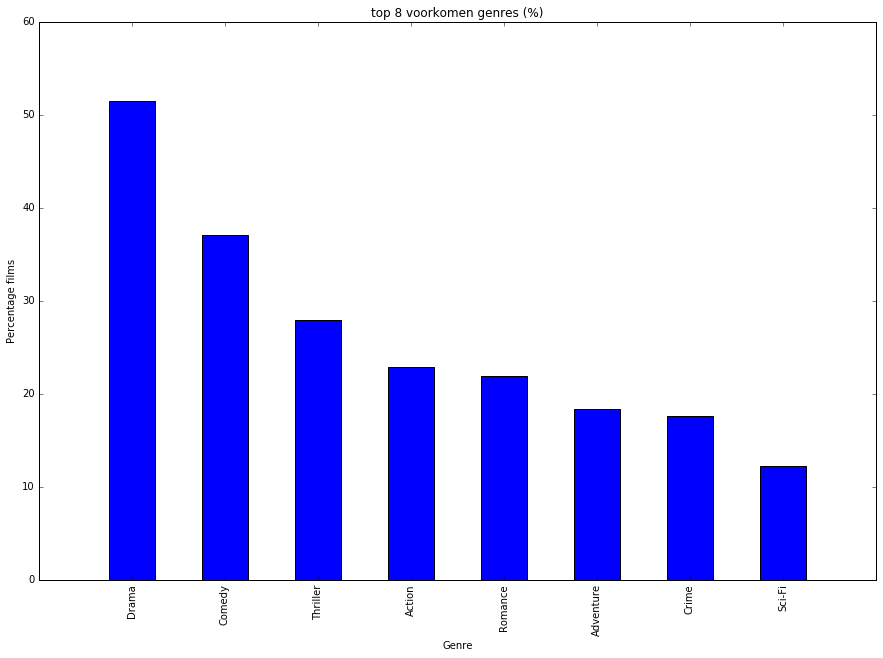

In [7]:
#fig = plt.figure(figsize=(15, 7))
#fig.suptitle('% occurence of genres in top 5000', fontsize=14, fontweight='bold')
#ax1 = fig.add_subplot(121)
#ax1.pie(g_amount[:10],explode=None,labels=genres,autopct='%1.2f%%',shadow=True, startangle=900)

#plt.show()

#pass
y = g_amount[:8]
x = np.arange(8)
labels = genres[:8]

fig = plt.figure(figsize=(15, 10))
plt.title("top 8 voorkomen genres (%)")
plt.bar(x,y,width=0.5,color="blue",align="center")
plt.xticks(x , labels, rotation=90, fontsize=10)
plt.ylabel("Percentage films")
plt.xlabel("Genre")
#ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

pass

In [12]:
#imdb_genre = movie_data.sortBy(lambda x: x[25], ascending = False)
#imdb_genre = imdb_genre.filter(lambda x: float(x[25]) <= 10.0)
#imdb_genre = imdb_genre.map(lambda x: x[9])
imdb_genre = movie_data.map(lambda x: float(x[25])).filter(lambda x: x[25] <= 10.0)

#imdb_genre = imdb_genre.top(100, key=lambda x: x[25])

In [9]:
#director_data = movie_data.map(lambda x: x[1])
#director_data.take(5)
#counter_director_data = director_data.map(Counter).reduce(lambda x, y: x + y)
#print(counter_director_data)